In [392]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [393]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf

import math

In [394]:
file_path = Path(r"C:/Users/AYOOLA5\Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_ratings.csv")
IMbd_ratings_df = pd.read_csv(file_path)
IMbd_ratings_df.head() 

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [395]:
file_path = Path(r"C:/Users/AYOOLA5\Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_movies1.csv")
movies_df = pd.read_csv(file_path)
movies_df.head() 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0
2,tt0001892,Drama,53,"Germany, Denmark",NaN,5.8,188,NaN,5.0,2.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0


In [396]:
#Selecting relevant data from IMDb_ratings
clean_ratings_df = IMbd_ratings_df[["imdb_title_id",
                             "weighted_average_vote",
                             "total_votes",
                             "allgenders_0age_votes",
                             "allgenders_18age_votes",
                             "allgenders_30age_votes",
                             "allgenders_45age_votes",
                             "males_allages_votes",
                             "females_allages_votes"]]
clean_ratings_df.head()

,imdb_title_id,weighted_average_vote,total_votes,allgenders_0age_votes,allgenders_18age_votes,allgenders_30age_votes,allgenders_45age_votes,males_allages_votes,females_allages_votes
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [397]:
#renaming headers in ratings data to avoid confusion
new_names = {"allgenders_0age_votes":"tot_voters_below_18",
            "allgenders_18age_votes":"tot_voters_below_30",
            "allgenders_30age_votes":"tot_voters_below_45",
            "allgenders_45age_votes" : "tot_voters_above_45",
            "males_allages_votes":"tot_male_voters",
             "females_allages_votes": "tot_female_voters"}
ratings_df = clean_ratings_df.rename(columns=new_names)
ratings_df.head(5)

,imdb_title_id,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [408]:
imdb_data_df = pd.merge(movies_df,ratings_df, on="imdb_title_id", how="outer")
imdb_data_df.head()

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,Drama,53,"Germany, Denmark",NaN,5.8,188,NaN,5.0,2.0,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [409]:
#total null values in each column
imdb_data_df.isnull().sum()

imdb_title_id                0
genre                        0
duration                     0
country                     64
language                   833
avg_vote                     0
votes                        0
budget                   62145
reviews_from_users        7597
reviews_from_critics     11797
weighted_average_vote        0
total_votes                  0
tot_voters_below_18      52496
tot_voters_below_30        706
tot_voters_below_45         10
tot_voters_above_45         80
tot_male_voters              1
tot_female_voters           81
dtype: int64

In [410]:
#Combining under 18 and under 30 columns to reduce null values in tot_voters_below_18 column
below_18 = imdb_data_df["tot_voters_below_18"]
below_30 = imdb_data_df["tot_voters_below_30"]

combined = []

#Initiating for loop to add values in below 18 and below 30 columns 
#Appending it to combined list to replace both columns by combined

for i in range(len(imdb_data_df)):
    if math.isnan(below_18[i]) is True & math.isnan(below_30[i]) is True:
        combined.append(below_18[i] + below_30[i])
        

    elif math.isnan(below_18[i]) is True and math.isnan(below_30[i]) is False:
        combined.append(below_30[i])
            
    elif math.isnan(below_18[i]) == False and math.isnan(below_30[i]) == True:
        combined.append(below_18[i])
            
    else:
        combined.append(0)

In [411]:
# Dropping under 18 columns
imdb_data_df = imdb_data_df.drop("tot_voters_below_18", axis = 1)

# Repacing under 18 and under 30 columns by under 30(combined)
imdb_data_df["tot_voters_below_18"] = combined

In [417]:
#dropping empty values
imdb_data_df = imdb_data_df.dropna(subset =["language"])
imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [418]:
imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [419]:
Clean_imdb_data_df = imdb_data_df.drop(["imdb_title_id"],1)
Clean_imdb_data_df

,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [420]:
#Clean_imdb_data_df = Clean_imdb_data_df["genre"].str.split(',',expand=True)
#Clean_imdb_data_df


#Clean_imdb_data_df.assign(genre1= Clean_imdb_data_df.genre.str.split("|", expand = True).iloc[:,:1],
                          #genre2 = Clean_imdb_data_df.genre.str.split("|", expand = True).iloc[:,1:2])




In [421]:
Clean_imdb_data_df = imdb_data_df.drop_duplicates()
Clean_imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [422]:
Clean_imdb_data_df = imdb_data_df.dropna()
Clean_imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
7,tt0002445,"Drama, History",120,Italy,Italian,6.2,273,ITL 45000,7.0,5.0,6.2,273,34.0,99.0,69.0,191.0,21.0,0.0
9,tt0002461,Drama,55,"France, USA",English,5.5,225,"$30,000",8.0,1.0,5.5,225,11.0,95.0,72.0,168.0,15.0,11.0
19,tt0003471,"Crime, Drama",88,USA,English,6.0,552,"$5,700",14.0,11.0,6.0,552,42.0,182.0,226.0,399.0,54.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85828,tt9886872,"Comedy, Romance",130,India,Malayalam,8.1,990,INR 30000000,21.0,1.0,8.1,990,19.0,30.0,3.0,56.0,3.0,19.0
85831,tt9890308,Drama,85,"India, Netherlands, Singapore",Tamil,7.2,214,EUR 300000,4.0,21.0,7.2,214,70.0,54.0,20.0,137.0,16.0,0.0
85833,tt9892338,Drama,150,Bangladesh,Bengali,7.2,296,"$1,250,000",21.0,2.0,7.2,296,113.0,27.0,3.0,153.0,14.0,113.0
85835,tt9894394,Animation,100,Malaysia,Malay,7.9,440,MYR 20000000,61.0,1.0,7.9,440,85.0,77.0,14.0,196.0,41.0,0.0


In [423]:
Clean_imdb_data_df.dtypes


imdb_title_id             object
genre                     object
duration                   int64
country                   object
language                  object
avg_vote                 float64
votes                      int64
budget                    object
reviews_from_users       float64
reviews_from_critics     float64
weighted_average_vote    float64
total_votes                int64
tot_voters_below_30      float64
tot_voters_below_45      float64
tot_voters_above_45      float64
tot_male_voters          float64
tot_female_voters        float64
tot_voters_below_18      float64
dtype: object

In [431]:
print(f"Duplicates entries: {Clean_imdb_data_df.duplicated().sum()}")

Duplicates entries: 0


In [434]:
Clean_imdb_data_df1 = imdb_data_df.drop(["imdb_title_id","budget"],1)
Clean_imdb_data_df1

,genre,duration,country,language,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Comedy,95,"France, Belgium",French,5.3,398,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,Drama,130,India,Malayalam,7.9,265,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [435]:
Clean_imdb_data_df1 = Clean_imdb_data_df1.dropna()
Clean_imdb_data_df1 

,genre,duration,country,language,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85842,"Animation, Adventure, Crime",58,Japan,Japanese,6.9,103,1.0,1.0,6.9,103,22.0,30.0,8.0,64.0,3.0,22.0
85843,"Action, Thriller",145,India,Tamil,8.5,8400,188.0,8.0,8.5,8400,2297.0,1469.0,84.0,4577.0,121.0,0.0
85846,War,92,UK,"English, Polish, Russian, German",5.0,764,29.0,6.0,5.0,764,37.0,135.0,151.0,310.0,36.0,0.0
85849,"Comedy, Drama",122,India,Malayalam,6.8,491,9.0,1.0,6.8,491,134.0,117.0,7.0,289.0,8.0,134.0


In [439]:
# Determine the number of unique values in each column.
ratings_cat = Clean_imdb_data_df1.dtypes[Clean_imdb_data_df1.dtypes == "object"].index.tolist()
ratings_cat 

['genre', 'country', 'language']

In [440]:
Clean_imdb_data_df[ratings_cat ].nunique()

genre        746
country     2103
language    2027
dtype: int64

In [441]:
genre = Clean_imdb_data_df.genre.value_counts()
genre 

Drama                         1922
Comedy                        1029
Comedy, Drama                  796
Drama, Romance                 689
Horror                         679
                              ... 
Music, Romance, War              1
Drama, Crime, Thriller           1
Adventure, Musical, War          1
Western, Adventure, Comedy       1
Horror, Thriller, Crime          1
Name: genre, Length: 746, dtype: int64

<AxesSubplot:ylabel='Density'>

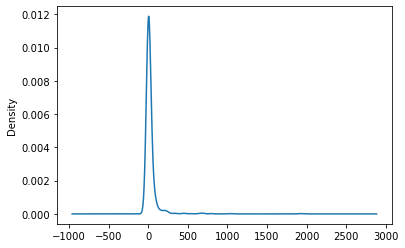

In [442]:
# Visualize the value counts of genre
genre.plot.density()

In [443]:
# Determine which values to replace if counts are less than ...?
replace_genre = list(genre [genre < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df.genre = Clean_imdb_data_df.genre.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.genre.value_counts()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other                     14606
Drama                      1922
Comedy                     1029
Comedy, Drama               796
Drama, Romance              689
Horror                      679
Comedy, Drama, Romance      647
Comedy, Romance             541
Name: genre, dtype: int64

In [444]:
# Look at duration value counts for binning
duration= Clean_imdb_data_df.duration.value_counts()
duration

90     1106
95      739
100     708
92      594
93      575
       ... 
205       1
203       1
211       1
338       1
287       1
Name: duration, Length: 194, dtype: int64

<AxesSubplot:ylabel='Density'>

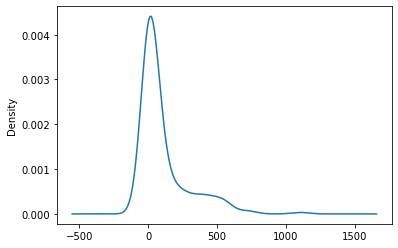

In [445]:
# Visualize the value counts of duration
duration.plot.density()

In [446]:
# Determine which values to replace if counts are less than ...?
replace_duration = list(duration [duration < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df.duration = Clean_imdb_data_df.duration.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.duration.value_counts()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


90     1106
95      739
100     708
92      594
93      575
       ... 
205       1
203       1
211       1
338       1
287       1
Name: duration, Length: 194, dtype: int64

In [447]:
country = Clean_imdb_data_df.country.value_counts()
country

USA                                                              9891
UK                                                                940
India                                                             697
Canada                                                            598
France                                                            374
                                                                 ... 
Republic of North Macedonia, Germany, Italy, Bulgaria, Spain        1
France, Angola                                                      1
Georgia, Germany, France, Czech Republic, Kazakhstan, Hungary       1
Bulgaria, UK, France                                                1
Croatia, Canada, USA                                                1
Name: country, Length: 2103, dtype: int64

<AxesSubplot:ylabel='Density'>

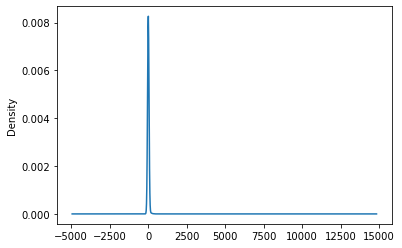

In [448]:
# Visualize the value counts of duration
country.plot.density()

In [449]:
# Determine which values to replace if counts are less than ...?
replace_country = list(country [country < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df.country = Clean_imdb_data_df.country.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.country.value_counts()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


USA                                                              9891
UK                                                                940
India                                                             697
Canada                                                            598
France                                                            374
                                                                 ... 
Republic of North Macedonia, Germany, Italy, Bulgaria, Spain        1
France, Angola                                                      1
Georgia, Germany, France, Czech Republic, Kazakhstan, Hungary       1
Bulgaria, UK, France                                                1
Croatia, Canada, USA                                                1
Name: country, Length: 2103, dtype: int64

In [450]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Clean_imdb_data_df[ratings_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(ratings_cat)
encode_df.head()

,genre_Comedy,"genre_Comedy, Drama","genre_Comedy, Drama, Romance","genre_Comedy, Romance",genre_Drama,"genre_Drama, Romance",genre_Horror,genre_Other,"country_Afghanistan, Ireland, Japan, Iran, Netherlands",country_Albania,...,"language_Vietnamese, Mandarin",language_Welsh,"language_Xhosa, English","language_Xhosa, Southern Sotho, English, Afrikaans","language_Xhosa, Zulu, English, Afrikaans",language_Yiddish,"language_Zulu, English","language_Zulu, English, Afrikaans","language_Zulu, English, Hindi","language_Zulu, Xhosa, Afrikaans, English"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#imdb_data_encoded = pd.get_dummies(imdb_data_df, columns=["weighted_average_vote"])
#imdb_data_encoded.head()

In [ ]:
imdb_data_df.country

In [ ]:
country = imdb_data_df.country.value_counts()
country

In [ ]:
imdb_data_df.genre   

In [ ]:
genre  = imdb_data_df.genre.value_counts()
genre 

In [ ]:
weighted_average_vote =  imdb_data_df.weighted_average_vote .value_counts()
weighted_average_vote

In [ ]:
imdb_data_df.count

In [ ]:
# Create our features                                   
imdb_data_df = pd.get_dummies(imdb_data_df, columns=["genre","duration","country","language",])                                          
imdb_data_df                               
                                      

In [ ]:
# Standardize the data with StandardScaler()
X_scaled = StandardScaler().fit_transform(imdb_data_df)
print(X_scaled [0:5])


In [ ]:
# Create a DataFrame fro
# Create our features
X = imdb_data_df.drop(columns="weighted_average_vote")
X = pd.get_dummies(X)
X.head()

# Create our target
y = imdb_data.df["weighted_average_vote"]
y

In [ ]:
X

In [ ]:
# Create our features
X = pd.get_dummies(X)
X.head()



In [ ]:
X.describe()
X

In [ ]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape